In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Regularization

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b, *argv):
    m, n = X.shape
    total_cost = 0
    for i in range(m):
        y_hat = sigmoid(np.dot(X[i], w) + b)
        loss = -1 * (y[i] * np.log(y_hat) + (1 - y[i]) * np.log(1 - y_hat))
        total_cost += loss
    total_cost /= m
    return total_cost

def compute_gradient(X, y, w, b, *argv):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        dj_db += f_wb - y[i]
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i, j]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

def compute_cost_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = 0.
    for j in range(n):
        reg_cost += w[j] ** 2
    reg_cost = lambda_ * reg_cost / (2 * m)
    total_cost = cost_without_reg + reg_cost
    return total_cost

def compute_gradient_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    for j in range(n):
        dj_dw[j] += lambda_ * w[j] / m
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
    return w_in, b_in

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

## Import Diabetes Prediction Dataset

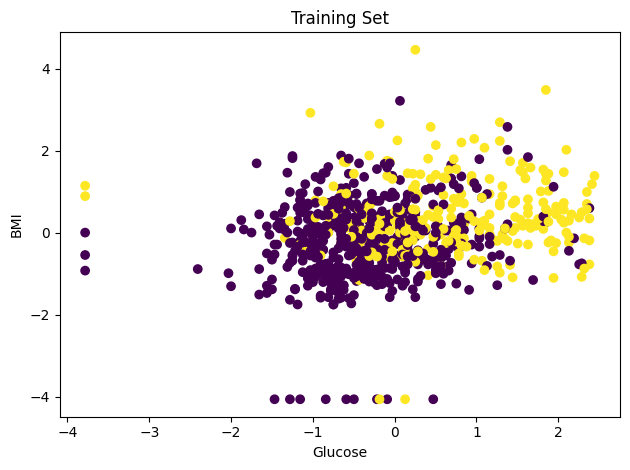

In [3]:
df = pd.read_csv('datasets/Diabetes_Prediction.csv')
df = df[['Glucose', 'BMI', 'Outcome']].iloc[:, :]
X = df[['Glucose', 'BMI']].to_numpy()
y = df['Outcome'].to_numpy()
features = ['Glucose', 'BMI']
target = ['Outcome']
X_norm = StandardScaler().fit_transform(X)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c = y)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Training Set')
plt.tight_layout()
plt.savefig('figures/of_01.png')
plt.show()

In [4]:
X_1 = PolynomialFeatures(degree=1, include_bias=False).fit_transform(X_norm)
X_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_norm)
X_4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(X_norm)
X_6 = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X_norm)
training_sets = [X_1, X_2, X_4, X_6]
degrees = [1, 2, 4, 6]

alpha = 0.001
iterations = 10000

## Without Regularization

[array([0.86550313, 0.47638866]), array([ 0.83940357,  0.4861859 ,  0.08734641, -0.01001607, -0.04387145]), array([ 0.52921764,  0.33981491, -0.25158678,  0.04457072, -0.36308972,
        0.18460908,  0.29757184,  0.17102783,  0.07106651,  0.05781507,
       -0.09460539, -0.17660441, -0.01815852,  0.04454142]), array([ 0.45464514,  0.24814184, -0.1198056 ,  0.00530836, -0.26357688,
        0.45019191,  0.04551586,  0.14278729,  0.28394414, -0.08769976,
        0.00895117, -0.16492982, -0.13465748, -0.2200349 , -0.01174532,
        0.12301921,  0.11676389,  0.16220682,  0.05954411,  0.02760106,
       -0.00381878, -0.05269478, -0.01507904, -0.04672515, -0.03553138,
       -0.00747112,  0.00555006])] [np.float64(-0.6286509042410634), np.float64(-0.6328273748148309), np.float64(-0.5004281515234352), np.float64(-0.4316856205532624)]


C:\Users\pdksean\AppData\Local\Temp\ipykernel_15832\2937395966.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


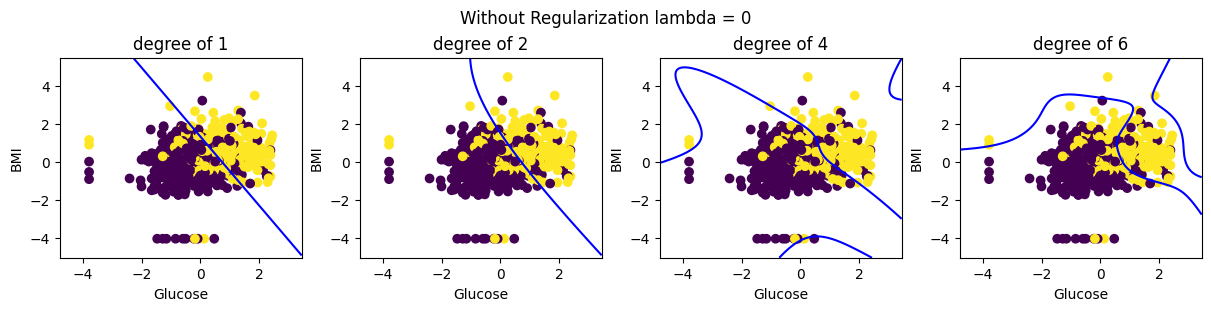

In [5]:
lambda_ = 0
w_fin = []
b_fin = []

for i in range(len(training_sets)):
    initial_w = np.zeros_like(training_sets[i][0, :])
    initial_b = 0.
    w, b = gradient_descent(training_sets[i], y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, lambda_)
    w_fin.append(w)
    b_fin.append(b)

print(w_fin, b_fin)

fig, axes = plt.subplots(1, 4, figsize = (12, 3), constrained_layout = True)

for i in range(4):
    ax = axes[i]
    ax.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title('degree of {}'.format(degrees[i]))

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    grid_points_poly = poly.fit_transform(grid_points)

    Z = predict(grid_points_poly, w_fin[i], b_fin[i])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0.5], colors=['blue'])

fig.suptitle('Without Regularization lambda = {}'.format(lambda_))
plt.savefig('figures/of_02.png')
plt.show()

## With Regularization

[array([0.86137274, 0.47420346]), array([ 0.8353048 ,  0.48375532,  0.08761713, -0.00971773, -0.04337625]), array([ 0.52640202,  0.33796175, -0.24969596,  0.04440373, -0.36064052,
        0.18428279,  0.29572043,  0.17024096,  0.07087478,  0.05775209,
       -0.09383416, -0.17553968, -0.01806034,  0.0443143 ]), array([ 0.45213865,  0.24671031, -0.1191022 ,  0.00522717, -0.26077591,
        0.44780264,  0.04508267,  0.14195612,  0.28221414, -0.08738773,
        0.0088815 , -0.16351386, -0.13380369, -0.21582125, -0.01158374,
        0.1216141 ,  0.115945  ,  0.16364864,  0.06540104,  0.02405918,
       -0.00372395, -0.05290795, -0.01589174, -0.04412118, -0.03084038,
       -0.01080737,  0.02033168])] [np.float64(-0.6282866079994326), np.float64(-0.632818089282639), np.float64(-0.5012872175944814), np.float64(-0.4323778861941631)]


C:\Users\pdksean\AppData\Local\Temp\ipykernel_15832\2937395966.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


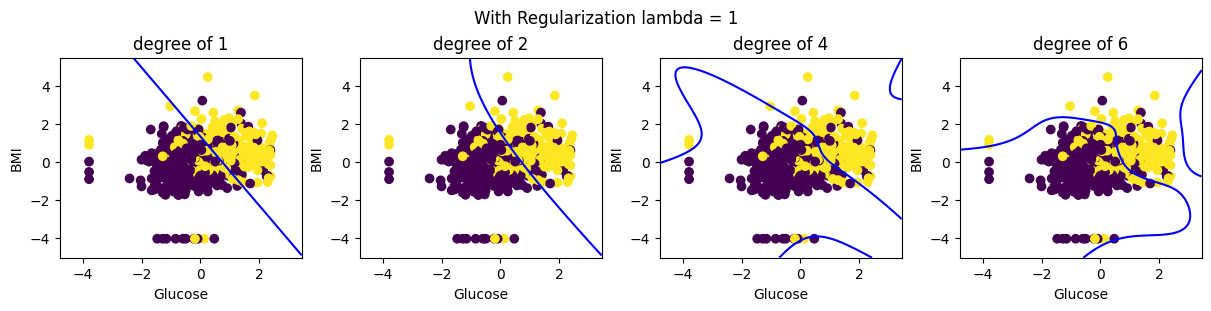

In [6]:
lambda_ = 1
w_fin = []
b_fin = []

for i in range(len(training_sets)):
    initial_w = np.zeros_like(training_sets[i][0, :])
    initial_b = 0.
    w, b = gradient_descent(training_sets[i], y, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)
    w_fin.append(w)
    b_fin.append(b)

print(w_fin, b_fin)

fig, axes = plt.subplots(1, 4, figsize = (12, 3), constrained_layout = True)
for i in range(4):
    ax = axes[i]
    ax.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title('degree of {}'.format(degrees[i]))

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    grid_points_poly = poly.fit_transform(grid_points)

    Z = predict(grid_points_poly, w_fin[i], b_fin[i])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0.5], colors=['blue'])

fig.suptitle('With Regularization lambda = {}'.format(lambda_))
plt.savefig('figures/of_03.png')
plt.show()

[array([0.82574391, 0.45537014]), array([ 0.80000491,  0.4628814 ,  0.08981067, -0.00717651, -0.03924976]), array([ 0.50213547,  0.32201206, -0.23349253,  0.0429087 , -0.33962772,
        0.18155927,  0.2799349 ,  0.16354869,  0.06925095,  0.05717865,
       -0.08734849, -0.16635638, -0.01722671,  0.04236799]), array([ 0.43226623,  0.23571229, -0.11045878,  0.00644361, -0.24675222,
        0.42841577,  0.04426786,  0.13559731,  0.26796335, -0.08028817,
        0.01026166, -0.15461979, -0.12419064, -0.20778348, -0.01060269,
        0.11627381,  0.10940244,  0.1528703 ,  0.05873089,  0.03146609,
       -0.00366113, -0.05131824, -0.0167541 , -0.04168037, -0.03326749,
       -0.00043533,  0.02102831])] [np.float64(-0.6251164611937778), np.float64(-0.6327109959973798), np.float64(-0.5088391608988084), np.float64(-0.4379223684576858)]


C:\Users\pdksean\AppData\Local\Temp\ipykernel_15832\2937395966.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


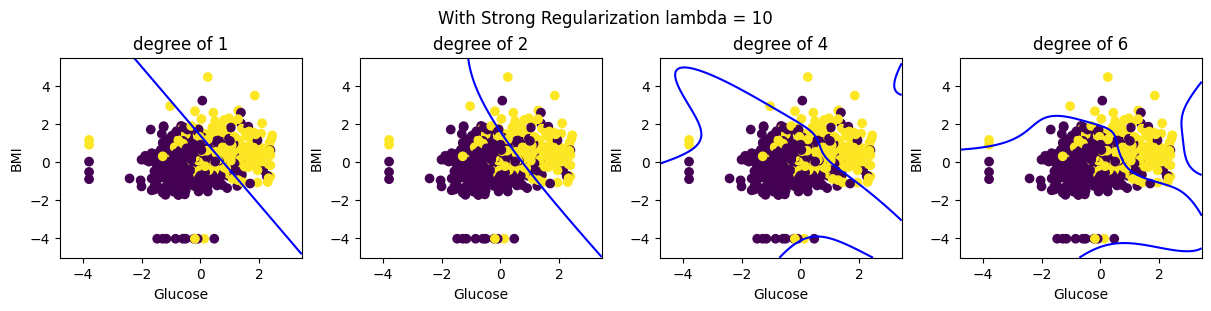

In [7]:
lambda_ = 10
w_fin = []
b_fin = []

for i in range(len(training_sets)):
    initial_w = np.zeros_like(training_sets[i][0, :])
    initial_b = 0.
    w, b = gradient_descent(training_sets[i], y, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)
    w_fin.append(w)
    b_fin.append(b)

print(w_fin, b_fin)

fig, axes = plt.subplots(1, 4, figsize = (12, 3), constrained_layout = True)
degrees = [1, 2, 4, 6]
for i in range(4):
    ax = axes[i]
    ax.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title('degree of {}'.format(degrees[i]))

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    grid_points_poly = poly.fit_transform(grid_points)

    Z = predict(grid_points_poly, w_fin[i], b_fin[i])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0.5], colors=['blue'])

fig.suptitle('With Strong Regularization lambda = {}'.format(lambda_))
plt.savefig('figures/of_04.png')
plt.show()

[array([0.57872525, 0.32533045]), array([ 0.5584131 ,  0.32311067,  0.09716069,  0.00811659, -0.01824881]), array([ 0.33655381,  0.21415737, -0.12815235,  0.0298905 , -0.20185732,
        0.16667779,  0.18110084,  0.12211399,  0.05972247,  0.05165229,
       -0.0512787 , -0.10383364, -0.01226755,  0.02972054]), array([ 0.29575115,  0.15858558, -0.05792931,  0.00935076, -0.15271484,
        0.29763838,  0.03986144,  0.09600404,  0.16501295, -0.04201748,
        0.01642814, -0.09105479, -0.06753594, -0.16276243, -0.00071869,
        0.08795478,  0.07383062,  0.09972142,  0.06025695,  0.02988528,
       -0.00225939, -0.03800625, -0.0133678 , -0.01514603, -0.03592669,
       -0.01101129,  0.02593119])] [np.float64(-0.6020971076977717), np.float64(-0.6297514913937374), np.float64(-0.5682910692089651), np.float64(-0.48453737074027986)]


C:\Users\pdksean\AppData\Local\Temp\ipykernel_15832\2937395966.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


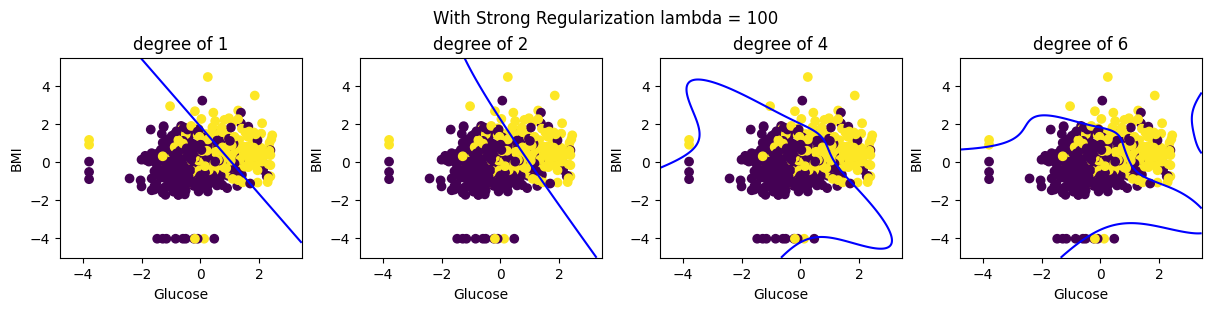

In [8]:
lambda_ = 100
w_fin = []
b_fin = []

for i in range(len(training_sets)):
    initial_w = np.zeros_like(training_sets[i][0, :])
    initial_b = 0.
    w, b = gradient_descent(training_sets[i], y, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)
    w_fin.append(w)
    b_fin.append(b)

print(w_fin, b_fin)

fig, axes = plt.subplots(1, 4, figsize = (12, 3), constrained_layout = True)
degrees = [1, 2, 4, 6]
for i in range(4):
    ax = axes[i]
    ax.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title('degree of {}'.format(degrees[i]))

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    grid_points_poly = poly.fit_transform(grid_points)

    Z = predict(grid_points_poly, w_fin[i], b_fin[i])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0.5], colors=['blue'])

fig.suptitle('With Strong Regularization lambda = {}'.format(lambda_))
plt.savefig('figures/of_05.png')
plt.show()

[array([0.14215699, 0.08639434]), array([ 0.13979841,  0.08515234,  0.05645014,  0.01171241, -0.00480669]), array([ 0.08451402,  0.0508556 , -0.00192881,  0.00569447, -0.02671964,
        0.11869007,  0.05348776,  0.05203799,  0.04559048,  0.03334332,
       -0.01303044, -0.01108761, -0.00682207,  0.01219055]), array([ 0.07093845,  0.03546527, -0.00658934,  0.00324541, -0.03195004,
        0.07963102,  0.01937346,  0.03202645,  0.03096136, -0.00892443,
        0.00970272, -0.01659716, -0.00565656, -0.06553747,  0.0238932 ,
        0.04349882,  0.02796184,  0.0260771 ,  0.0502918 ,  0.0609771 ,
        0.00664918, -0.00507896, -0.00310476,  0.00549154, -0.04053362,
       -0.01201086, -0.00606176])] [np.float64(-0.566958003639344), np.float64(-0.5970138403643281), np.float64(-0.6761871909915415), np.float64(-0.6285724338655373)]


C:\Users\pdksean\AppData\Local\Temp\ipykernel_15832\2937395966.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


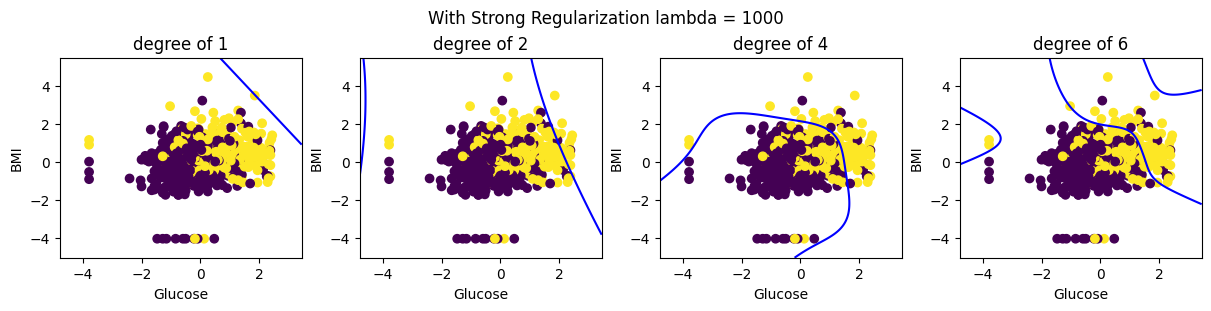

In [9]:
lambda_ = 1000
w_fin = []
b_fin = []

for i in range(len(training_sets)):
    initial_w = np.zeros_like(training_sets[i][0, :])
    initial_b = 0.
    w, b = gradient_descent(training_sets[i], y, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)
    w_fin.append(w)
    b_fin.append(b)

print(w_fin, b_fin)

fig, axes = plt.subplots(1, 4, figsize = (12, 3), constrained_layout = True)
degrees = [1, 2, 4, 6]
for i in range(4):
    ax = axes[i]
    ax.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title('degree of {}'.format(degrees[i]))

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    grid_points_poly = poly.fit_transform(grid_points)

    Z = predict(grid_points_poly, w_fin[i], b_fin[i])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0.5], colors=['blue'])

fig.suptitle('With Strong Regularization lambda = {}'.format(lambda_))
plt.savefig('figures/of_06.png')
plt.show()

## Visualizing Regularization Constraint

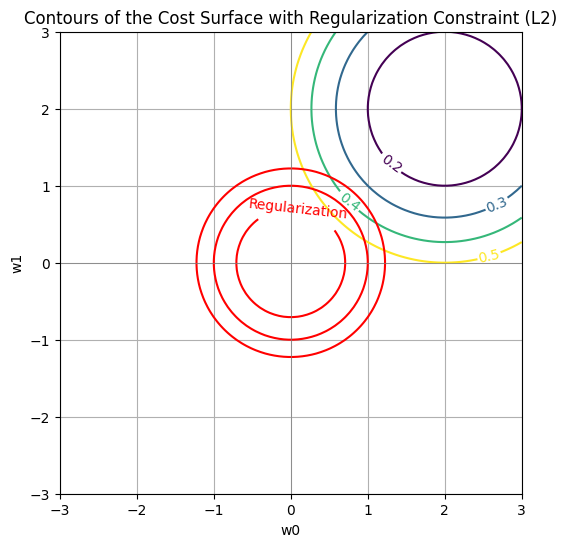

In [10]:
w1 = np.linspace(-3, 3, 100)
w2 = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1, w2)

loss_function = ((W1-2)**2 + (W2-2)**2 + 1 ) * 0.1

lambda_ = 1  # Regularization parameter
l2_constraint = W1**2 + W2**2

plt.figure(figsize=(8, 6))
contours = plt.contour(W1, W2, loss_function, levels=[0.2, 0.3, 0.4, 0.5], cmap='viridis')
plt.clabel(contours)

circle = plt.contour(W1, W2, l2_constraint, levels=[lambda_ * 1.5], colors='r')
circle = plt.contour(W1, W2, l2_constraint, levels=[lambda_], colors='r')
circle = plt.contour(W1, W2, l2_constraint, levels=[lambda_ * 0.5], colors='r')
plt.clabel(circle, fmt='Regularization')

plt.title('Contours of the Cost Surface with Regularization Constraint (L2)')
plt.xlabel('w0')
plt.ylabel('w1')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('figures/of_07.png')
plt.show()